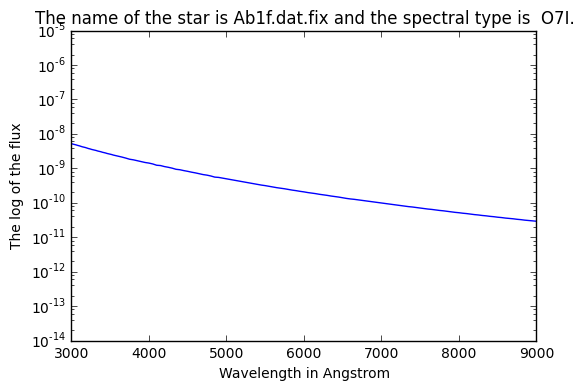

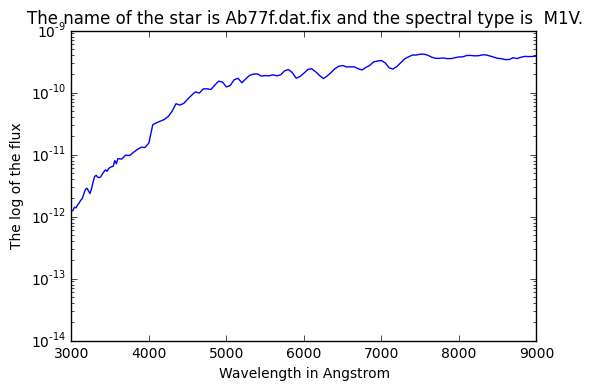

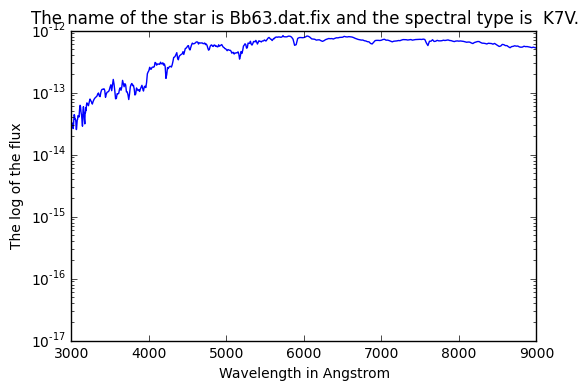

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def read(name):
    #reads csv file
    return(pd.read_table(name,sep = ','))

def calculating(name):
    #function that reads in csv file, then looks what its spectra type is, then normalises the flux and returns the title + the wavelength and flux.
    wavelength_and_flux = read(name)
    spectra = read("spectra.list.csv")
    
    # Series are directly iterable (like a list)
    j = 0
    for i in spectra['#filename']:
        j = j + 1
        if(i == name):
            type_name = spectra[' type'][j]
       
    #genormaliseerd flux
    wavelength_and_flux[' flux'] = wavelength_and_flux[' flux']/wavelength_and_flux.sum(axis = 1)
    
    return("The name of the star is " + name + " and the spectral type is " + type_name + ".", wavelength_and_flux['# wavelength'], wavelength_and_flux[' flux'])

def plot(title, x, y):
    #function to plot
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylabel("The log of the flux")
    plt.xlabel("Wavelength in Angstrom")
    plt.xlim(3000,9000)
    plt.title(title)
    plt.show()

a, b, c = calculating("Ab1f.dat.fix")
plot(a, b, c)

a, b, c = calculating("Ab77f.dat.fix")
plot(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plot(a, b, c)

In [28]:
import seaborn as sns
import mpld3
from bokeh.models import Title
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()
mpld3.enable_notebook()

def plotbokeh(title, x, y):#plots file with bokeh
    #Plotting with Bokeh(trying it out)
    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))
    p.line(x=x, y=y)
    p.add_layout(Title(text="The log of the flux", align="center"), "left")
    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")
    p.grid.grid_line_color = None
    show(p, notebook_handle=True)
    
a, b, c = calculating("Ab1f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Ab77f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plotbokeh(a, b, c)

Loading BokehJS ...

D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:24: DeprecationWarning: Comm._kernel_default is deprecate

D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:24: DeprecationWarning: Comm._kernel_default is deprecate

D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
D:\Anaconda3\lib\site-packages\ipykernel\comm\comm.py:24: DeprecationWarning: Comm._kernel_default is deprecate

2.
a)An Angstrom($\si{\angstrom}$) is 10$^{-10}$ m.
b)The unit of flux density is in SI units W/m$^2$ and another unit can be the Jansky.
c)

In [30]:
iets = read('vega.fnu.csv')
iets['#wavelength'] = iets['#wavelength'] * 10
wavelength = iets['#wavelength']
iets.flux = iets.flux*3e18/(wavelength**2)
Flux = iets.flux
name_filter = ["U", "B", "V"]
lambd_0 = [3659, 4582, 5448]
lambd_delta = [660, 940, 880]
l = []

for i in range(3):
    lamnieuw = np.linspace(lambd_0[i]-lambd_delta[i]/2,lambd_0[i]+lambd_delta[i]/2, 100)
    Fnieuw = np.interp(lamnieuw, wavelength, Flux)
    Cx = 2.5 * np.log10(np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw))
    Mag = -2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + Cx
    l.append(Cx)

[-20.906037214965792]
[-20.906037214965792, -20.600456877808334]
[-20.906037214965792, -20.600456877808334, -21.10453294444136]


/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


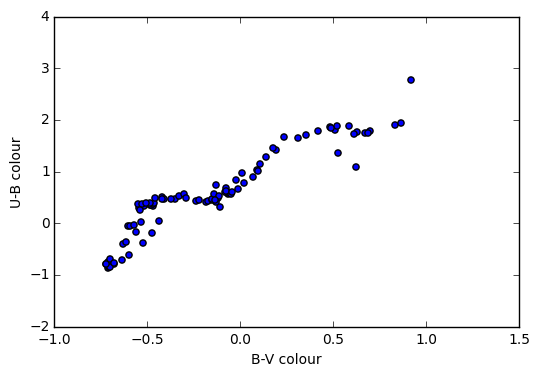

In [35]:
def m_x(lambd_0,lambd_delta,C_x,iets1):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'])
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + Cx)

spectra = read("spectra.list.csv")

for i in spectra['#filename']:
    iets1 = read(i)
    #print("For filter ", name_filter[0],",and the star ", i, ", the magnitude is",m_x(lambd_0[0],lambd_delta[0],l[0],iets1))
    #print("For filter ", name_filter[1],",and the star ", i, ", the magnitude is",m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
    #print("For filter ", name_filter[2],",and the star ", i, ", the magnitude is",m_x(lambd_0[2],lambd_delta[2],l[2],iets1))
    plt.scatter(m_x(lambd_0[1],lambd_delta[1],l[1],iets1)-m_x(lambd_0[2],lambd_delta[2],l[2],iets1), m_x(lambd_0[0],lambd_delta[0],l[0],iets1)-m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
    #plt.xlim(1.5,-0.5)
    plt.xlabel("B-V colour")
    plt.ylabel("U-B colour")